RandomForestRegressor with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with RandomForestRegressor involving two variables.

RandomForestRegressor
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a RandomForestRegressor task as it involves just two variables.

IMPORTING LIBRARIES

In [19]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

READING THE DATASET

In [20]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported")
data.head(10)

Data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [21]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [22]:
display(data.describe())

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [24]:
data.shape

(25, 2)

VISUALIZATION OF DATA.

C:\Users\RAMAKRISHNA\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


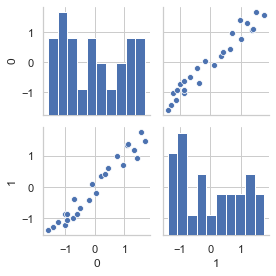

In [25]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
Sc =StandardScaler()
sns.set(style='whitegrid',context='notebook')
feature_plot=["Hours","Scores" ]
data_to_plot=data[feature_plot]
data_to_plot=Sc.fit_transform(data_to_plot)
data_to_plot=pd.DataFrame(data_to_plot)
sns.pairplot(data_to_plot,size=2.0)
plt.tight_layout()
plt.show()


AttributeError: 'Figure' object has no attribute 'set_size_Inches'

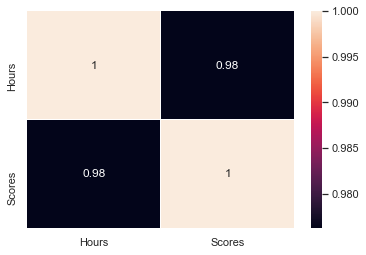

In [26]:
sns.heatmap(data.corr(),annot=True,linewidth=0.1)
fig=plt.gcf()
fig.set_size_Inches(8,6)
plt.show()


In [27]:
x = data.drop("Scores",axis=1)
y = data['Scores']

SPLITING THE THE DATA.

In [28]:
from sklearn.model_selection import train_test_split as tts 
(x_train,x_test,y_train,y_test)=tts(x, y, test_size=0.33, random_state=42)

In [29]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16, 1), (9, 1), (16,), (9,))

IMPORTING THE MODEL.

In [30]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X=x_train,y=y_train)

RandomForestRegressor()

In [31]:
y_pred = rfr.predict(x_test)
y_pred

array([79.8 , 27.17, 27.17, 72.11, 63.63, 28.44, 28.5 , 53.79, 30.74])

PREDICTING THE OUTPUT.

In [32]:
result = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
result

,Actual,Predicted
8,81,79.80
16,30,27.17
0,21,27.17
23,76,72.11
11,62,63.63
9,25,28.44
13,42,28.50
1,47,53.79
22,35,30.74


In [33]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.856666666666667


In [34]:

from sklearn.metrics import r2_score
print("r2_score ",r2_score(y_pred,y_test))

r2_score  0.9137299899248645
